## Modelisation with SegFormer

In [1]:
import sys  
sys.path.insert(0, './scripts')

# Import librairies, configs, helper functions
from helpers import *

config = base_config_resized

# config["use_saved_model_path"] = "./model_v4_full_cat_8.h5"
config["val_sample_nb"] = 100
config["train_sample_nb"] = 400
config["width"] = 2048
config["height"] = 1024
config["epoch"] = 4

n = NotebookProcessor(config)

{
    "width": 2048,
    "height": 1024,
    "classes": 8,
    "epoch": 4,
    "batch_size": 3,
    "learning_rate": 0.001,
    "train_sample_nb": 400,
    "val_sample_nb": 100,
    "use_saved_model_path": "",
    "gtFine_path": "./data/P8_Cityscapes_gtFine_trainvaltest.zip",
    "leftImg8bit_path": "./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip",
    "data_path": "./data/gtFine"
} 

Dataset already exist, skip downloading: ./data/P8_Cityscapes_gtFine_trainvaltest.zip
Dataset already exist, skip downloading: ./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip

- Sampling the training dataset from 2975 to 400.

- Sampling the validation dataset from 500 to 100.


2024-02-27 11:54:51.223631: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-27 11:54:51.223653: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2024-02-27 11:54:51.223682: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2024-02-27 11:54:51.223747: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-27 11:54:51.223768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Model definition

UNET is lorem ipsum

## Model usage

In [2]:
from transformers import pipeline
from PIL import Image
import requests
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation  

def external_model_pred(model_name, img_path, device="cpu"):  
    image = Image.open(img_path).convert("RGB")  
      
    # feature_extractor = Mask2FormerImageProcessor(do_resize=False)  
    # model = Mask2FormerForInstanceSegmentation.from_pretrained(model_name)
    
    processor = AutoImageProcessor.from_pretrained(model_name)
    model = Mask2FormerForUniversalSegmentation.from_pretrained(model_name)
    
    model.to(device)  
  
    inputs = processor(images=image, return_tensors="pt")  
    pixel_values = inputs["pixel_values"].to(device)  
  
    outputs = model(pixel_values=pixel_values)  
    predicted_segmentation = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

    return show_prediction(n.read_image(img_path),predicted_segmentation)


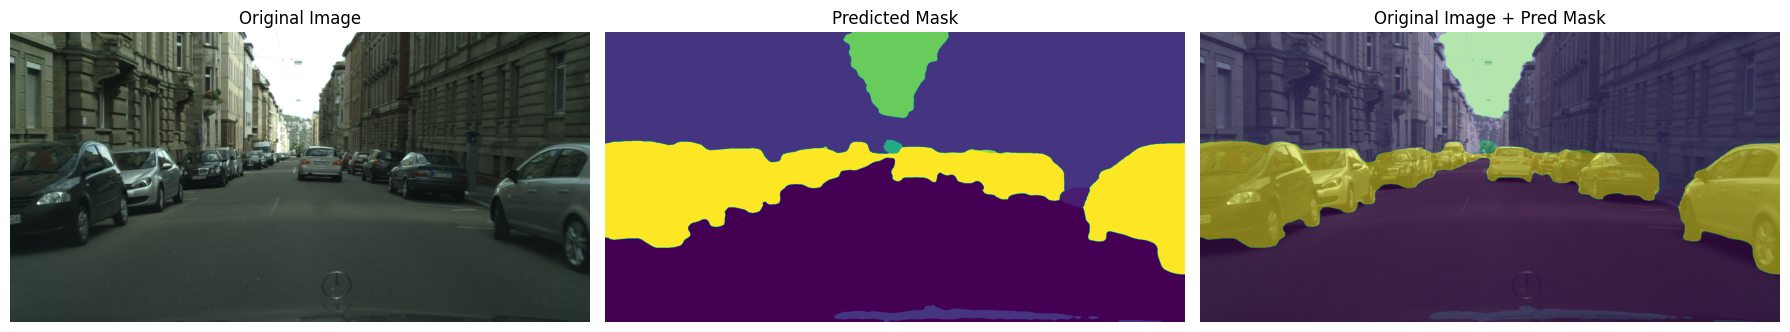

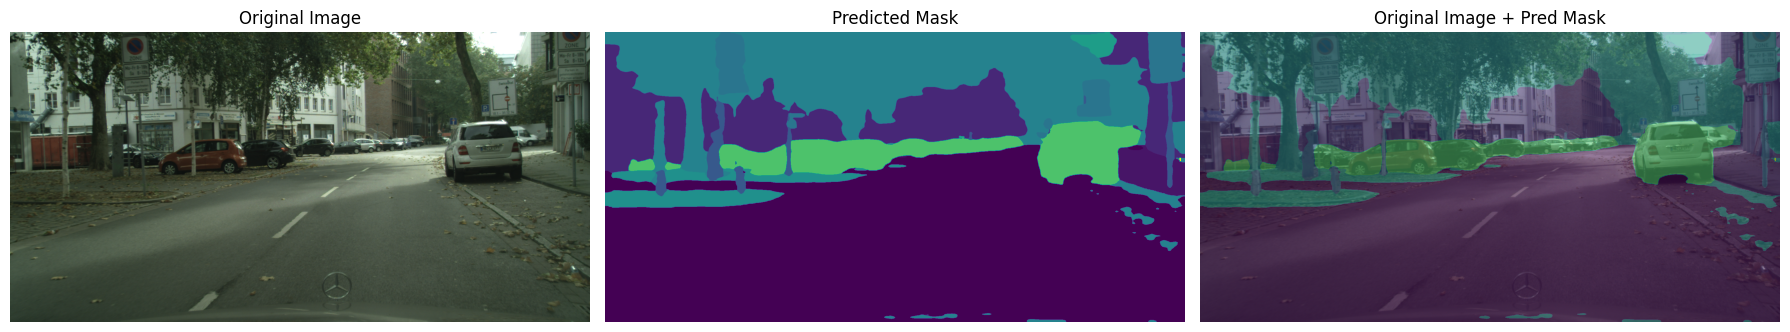

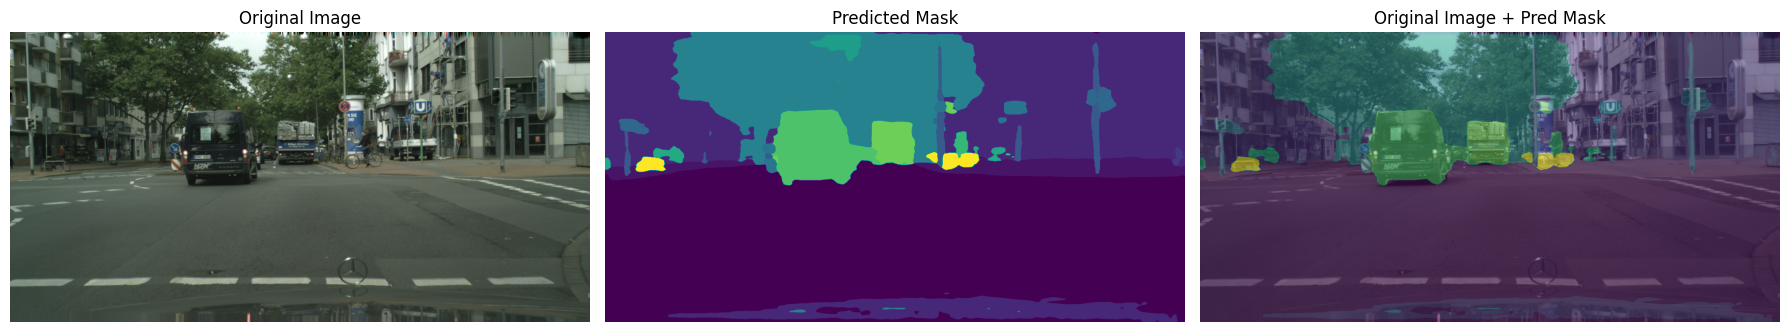

In [3]:
predicted_mask = external_model_pred("facebook/mask2former-swin-large-cityscapes-semantic", n.img["train"][0])
predicted_mask = external_model_pred("facebook/mask2former-swin-large-cityscapes-semantic", n.img["train"][1])
predicted_mask = external_model_pred("facebook/mask2former-swin-large-cityscapes-semantic", n.img["train"][2])